In [1]:
%run "../head.py"

In [2]:
from pathlib import Path

import h2 as h
import pandas as pd
from lib.plot import plot_chrom_position

In [3]:
lr_contour = pd.read_pickle(h.fig1 / "Fig1_contour" / f"Sperm.lr_contour.v{h.version}.pkl")
dv_contour = pd.read_pickle(h.fig1 / "Fig1_contour" / f"Sperm.dv_contour.v{h.version}.pkl")

In [4]:
batches = [
    "Sperm",
    "mouse1",
    "mouse2"
]

arg_bfs_lr_ss_files = { # single slice
    batch : (h.ddir / batch).with_suffix(".lr_ss.bfs.pkl")
    for batch in batches
}

arg_bfs_dv_ss_files = {
    batch : (h.ddir / batch).with_suffix(".dv_ss.bfs.pkl")
    for batch in batches
}

arg_bfs_lr_ft_files = { # full thickness
    batch : (h.ddir / batch).with_suffix(".lr_ft.bfs.pkl")
    for batch in batches
}

arg_bfs_voxel_files = {
    batch : (h.ddir / batch).with_suffix(".voxel.bfs.pkl")
    for batch in batches
}

In [5]:
from hic_basic.plot.utils import filling_l2r_plotly
from plotly.subplots import make_subplots

from hic_basic.data import chromosomes

mm10 = chromosomes("mm10")

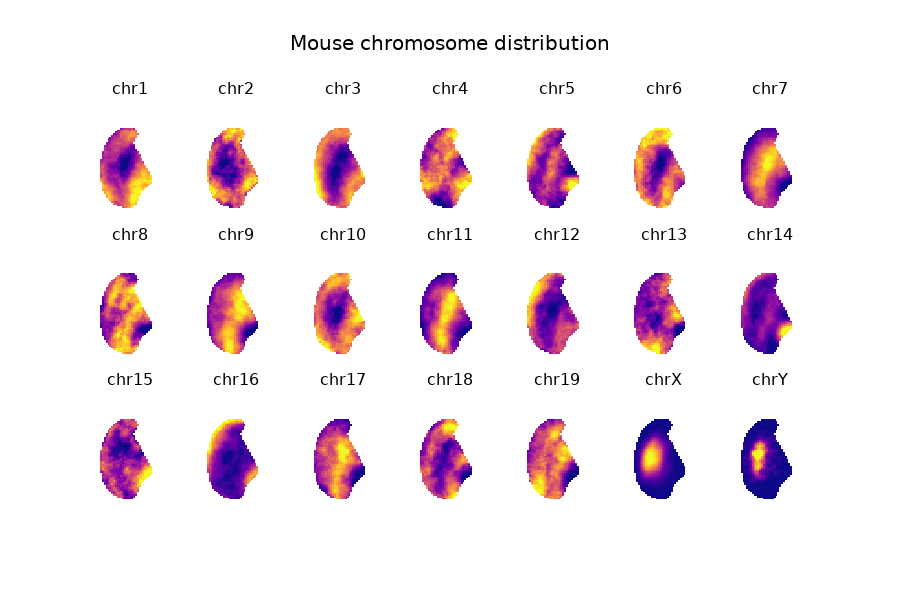

In [9]:
#bfs = pd.read_pickle(arg_bf_lr_cs_files["tillsperm25"])
#bfs = bfs.loc[-5:5].groupby(level=(1,2), observed=False).sum(min_count=1)
bfs = pd.read_pickle(arg_bfs_lr_ss_files["Sperm"])
if h.version in ["1", "2"]:
    fig = plot_chrom_position(
        bfs,
        mm10.index,
        # (ratio; slice)
        "Mouse chromosome distribution",
        lr_contour,
        #minCells=80,
        #zmin = 0,
        #zmax = 0.1,
        normL=None,
        #ratio = True,
        ratio = True,
        t_filt = 0.02,
        #showscale = True,
        cmap = "Plasma"
        )
    fig.update_layout(
        template = h.template
    )
    #fig.write_image("output/mouse_sperm_chrom_position.pdf")
    fig.write_image("output/mouse_sperm_chrom_position_separate_scale.pdf")
elif h.version == "0":
    fig = plot_chrom_position(
        bfs,
        mm10.index,
        "Mouse chromosome distribution (count; slice)",
        lr_contour,
        #minCells=80,
        zmin = 0,
        zmax = 10,
        normL=mm10["length"],

        )
fig.show(renderer="png")
#fig.show()